# Model Developent.

**Initial steps:**

1. Import required libraries.

2. Load the data.

3. Linear Regression.

4. Multiple Linear Regression.

5. Polynomial Regression.

6. Multivariate Polynomial Regression & Pipeline.

7. Model evaluation measurements.

8. Determining a Good Model Fit.

## 1. Import required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats

## 2. Load the data.

In [2]:
# Import data from csv to a Pandas DataFrame

df = pd.read_csv('Data/Cars_ReCleanData.csv')
df.head()

,Make,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Horsepower binned,Diesel,Gas
0,SUBARU,2,hatchback,four,0.297546,9.0,69,4900,31,36,5118.0,Low,0,1
1,MAZDA,2,hatchback,four,0.279141,9.0,68,5000,30,31,5195.0,Low,0,1
2,TOYOTA,2,hatchback,four,0.282209,9.0,62,4800,35,39,5348.0,Low,0,1
3,MITSUBISHI,2,hatchback,four,0.282209,9.4,68,5500,37,41,5389.0,Low,0,1
4,HONDA,2,hatchback,four,0.242331,10.1,60,5500,38,42,5399.0,Low,0,1


## 3. Linear Regression.

$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$

**Linear function:**

$$
Yhat = b  X + c
$$

- **c** refers to the *intercept* of the regression line, in other words: the value of Y when X is 0.
- **b** refers to the *slope* of the regression line, in other words: the value with which Y changes when X increases by 1 unit.

In [3]:
# Creation of the linear regression model
lr = LinearRegression()
# Data selection
X = df[['Highway mpg']]
Y = df['Price']
# Fit the model
lr.fit(X,Y)
# Print model data
print('Y = {} X + {}'.format(lr.coef_, lr.intercept_))
# Predict
Yhat = lr.predict(X)

Y = [-664.51164061] X + 31669.12926455425


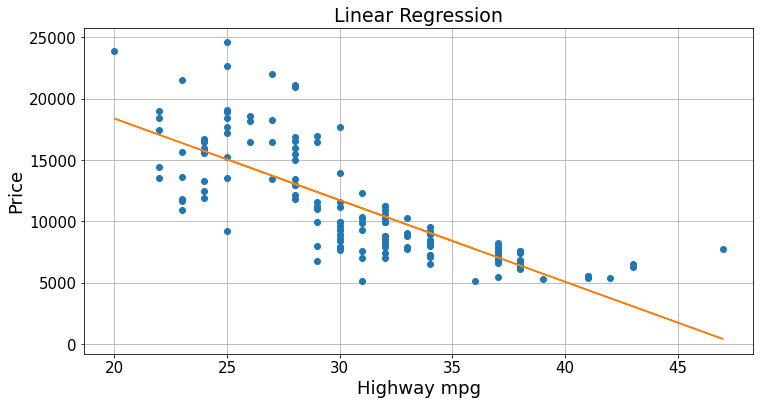

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X,Y,'o')
ax.plot(X, Yhat)
ax.set_xlabel(r"Highway mpg", fontsize=18)
ax.set_ylabel(r"Price", fontsize=18)
ax.set_title(r"Linear Regression", fontsize=19)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

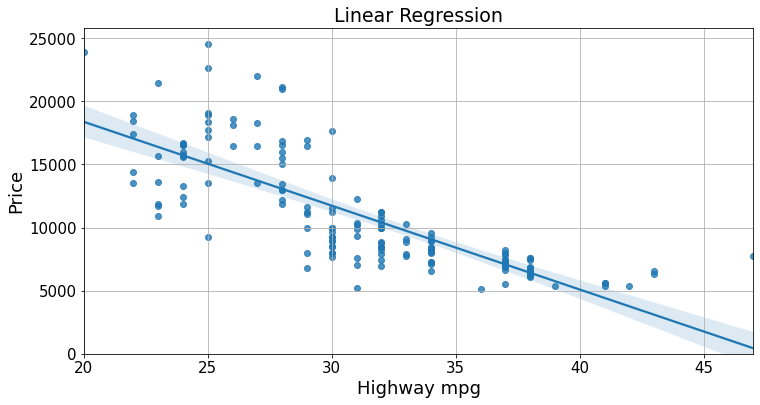

In [5]:
plt.figure(figsize=(12,6))
sns.regplot(x="Highway mpg", y="Price", data=df)
plt.xlabel(r"Highway mpg", fontsize=18)
plt.ylabel(r"Price", fontsize=18)
plt.title(r"Linear Regression", fontsize=19)
plt.tick_params(labelsize=15)
plt.ylim(0,)
plt.grid(True);

### Residual Plot

A residual plot shows the difference between the observed value (Y) and the predicted value (Yhat). In the regression plot, the residual is the distance from the data point to the fitted regression line. If the points are randomly spread around cero, then the model is appropiate

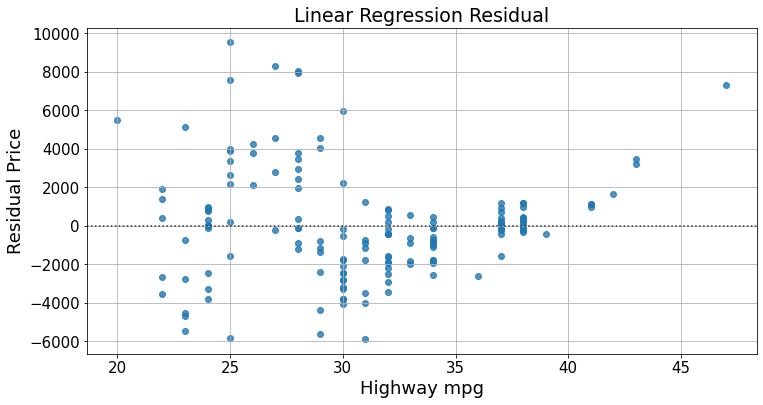

In [6]:
plt.figure(figsize=(12,6))
sns.residplot(df['Highway mpg'], df['Price'])
plt.xlabel(r"Highway mpg", fontsize=18)
plt.ylabel(r"Residual Price", fontsize=18)
plt.title(r"Linear Regression Residual", fontsize=19)
plt.tick_params(labelsize=15)
plt.grid(True);

In [7]:
df[["Highway mpg","Price"]].corr()

,Highway mpg,Price
Highway mpg,1.00000,-0.78833
Price,-0.78833,1.00000


## 4. Multiple Linear Regression. 

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

#### Linear function:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

- **c** refers to the *intercept* of the regression line, in other words: the value of Y when X is 0.
- **m** refers to the *slope* of the regression line, in other words: the value with which Y changes when X increases by 1 unit.

In [8]:
# Creation of the linear regression model
lr_mult = LinearRegression()
# Data selection
X_mult = df[['Horsepower', 'City mpg', 'Highway mpg']]
Y = df['Price']
# Fit the model
lr_mult.fit(X_mult,Y)
# Print model data
print('Y = {} X_mult + {}'.format(lr.coef_, lr.intercept_))
# Predict
Yhat_mult = lr_mult.predict(X_mult)

Y = [-664.51164061] X_mult + 31669.12926455425


To visualize a model for Multiple Linear Regression we can evaluate a *distribution plot* of the fitted values that result from the model and compare it to the distribution of the actual values. Fitted values are reasonably close to the actual values, since the two distributions overlap a bit.

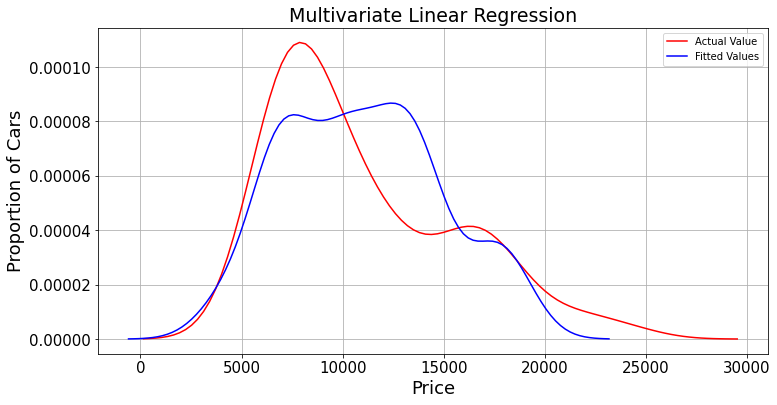

In [9]:
plt.figure(figsize=(12,6))
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_mult, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.xlabel(r"Price", fontsize=18)
plt.ylabel(r"Proportion of Cars", fontsize=18)
plt.title(r"Multivariate Linear Regression", fontsize=19)
plt.tick_params(labelsize=15)
plt.axis("tight")
plt.grid(True)

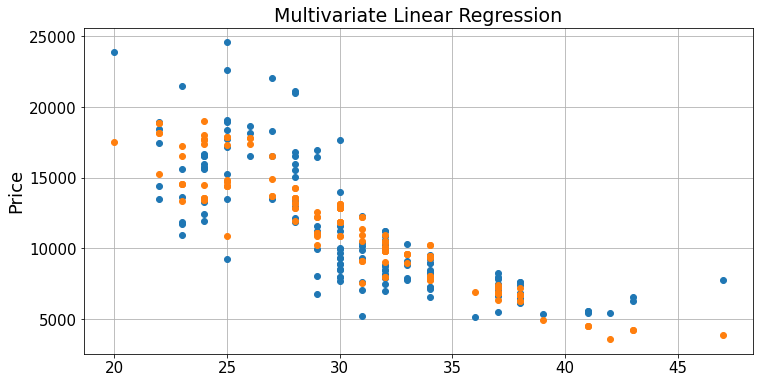

In [31]:
x_new = range(0,len(Y))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Highway mpg'],Y,'o')
ax.plot(df['Highway mpg'], Yhat_mult, 'o')
#ax.set_xlabel(r"Case", fontsize=18)
ax.set_ylabel(r"Price", fontsize=18)
ax.set_title(r"Multivariate Linear Regression", fontsize=19)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

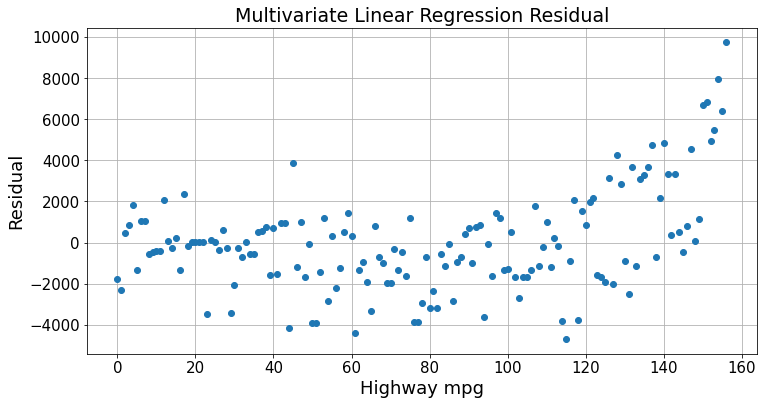

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_new,Y - Yhat_mult,'o')
ax.set_xlabel(r"Highway mpg", fontsize=18)
ax.set_ylabel(r"Residual", fontsize=18)
ax.set_title(r"Multivariate Linear Regression Residual", fontsize=19)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

## 5. Polynomial Regression.

There are different orders of polynomial regression:

$$
Quadratic - 2nd\ order\\
Yhat = a + b_1 X^2 +b_2 X^2 \\
$$

$$
Cubic - 3rd\ order\\
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$

$$
Higher\ order\\
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

Taking this into account, let's re-evaluate the *Highway mpg vs Price* relationship with a 3rd order polinomial.

In [12]:
X = df['Highway mpg']
Y = df['Price']

poly_coeff = np.polyfit(X, Y, 3)
polinomial = np.poly1d(poly_coeff)
print(polinomial)

       3         2
2.152 x - 187.2 x + 4563 x - 1.51e+04


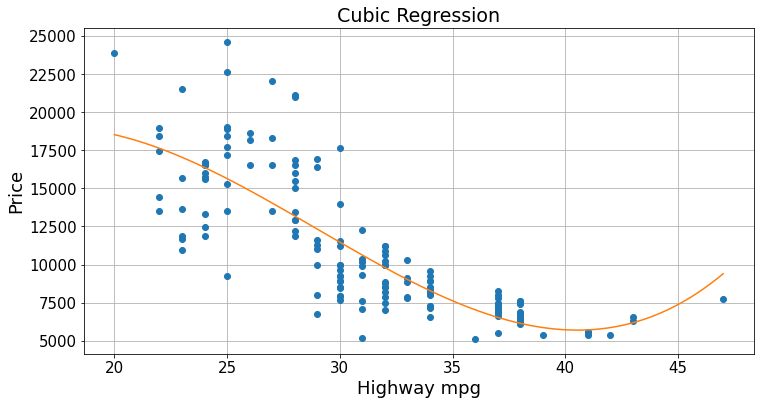

In [13]:
x_new = np.linspace(min(X), max(X), 100)
Yhat = polinomial(x_new)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X,Y,'o')
ax.plot(x_new, Yhat)
ax.set_xlabel(r"Highway mpg", fontsize=18)
ax.set_ylabel(r"Price", fontsize=18)
ax.set_title(r"Cubic Regression", fontsize=19)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

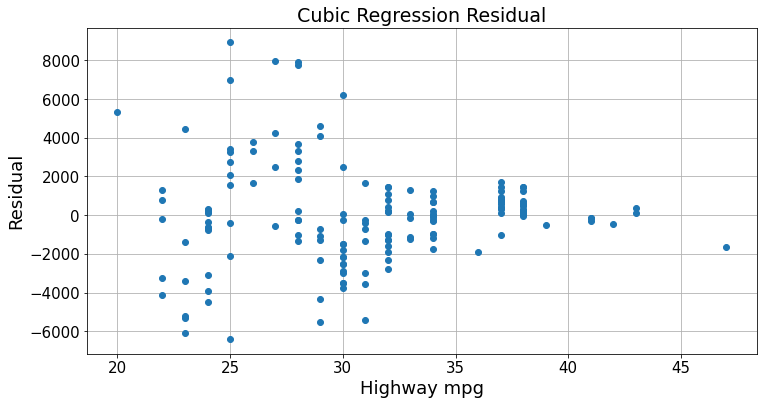

In [14]:
Yhat = polinomial(X)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X,Y - Yhat,'o')
ax.set_xlabel(r"Highway mpg", fontsize=18)
ax.set_ylabel(r"Residual", fontsize=18)
ax.set_title(r"Cubic Regression Residual", fontsize=19)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

### Analisys of an 11th order polynomial

In [15]:
poly_coeff_2 = np.polyfit(X, Y, 11)
polinomial_2 = np.poly1d(poly_coeff_2)
print(polinomial_2)

            11             10             9          8        7
-2.121e-08 x  + 1.135e-06 x  + 0.0009178 x - 0.1999 x + 20.2 x
         6             5             4             3             2
 - 1240 x + 5.023e+04 x - 1.379e+06 x + 2.549e+07 x - 3.045e+08 x + 2.127e+09 x - 6.604e+09


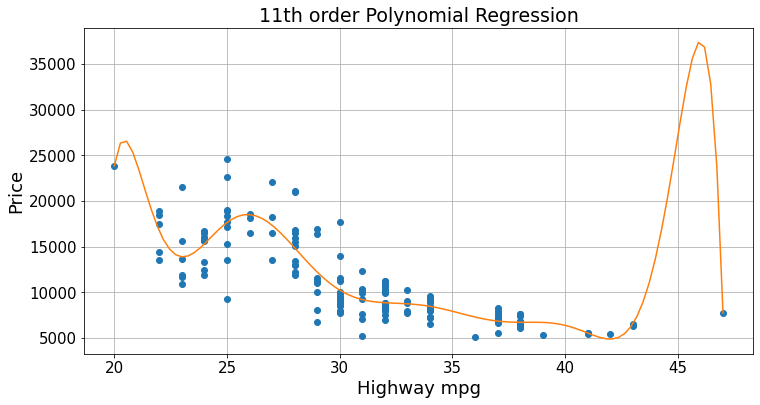

In [16]:
x_new = np.linspace(min(X), max(X), 100)
Yhat = polinomial_2(x_new)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X,Y,'o')
ax.plot(x_new, Yhat)
ax.set_xlabel(r"Highway mpg", fontsize=18)
ax.set_ylabel(r"Price", fontsize=18)
ax.set_title(r"11th order Polynomial Regression", fontsize=19)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

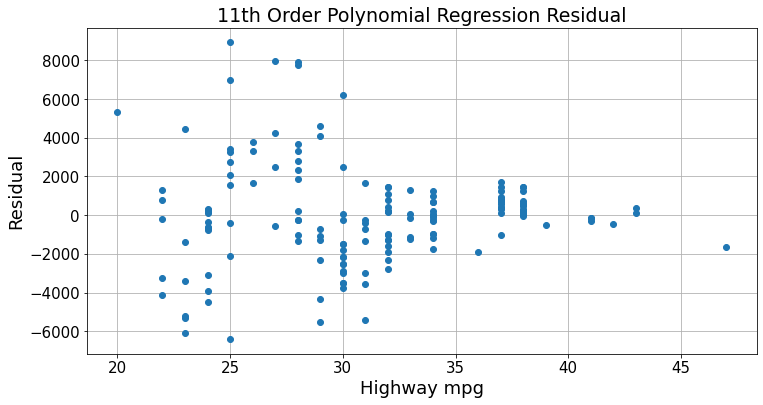

In [17]:
Yhat = polinomial(X)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X,Y - Yhat,'o')
ax.set_xlabel(r"Highway mpg", fontsize=18)
ax.set_ylabel(r"Residual", fontsize=18)
ax.set_title(r"11th Order Polynomial Regression Residual", fontsize=19)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

## 6. Multivariate Polynomial Regression & Pipeline.

The expressions are more complicated, but for a second order multivariate polynomial with two variables the expression is:

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

For this analysis we must run:
- `from sklearn.preprocessing import PolynomialFeatures`
- `from sklearn.pipeline import Pipeline`
- `from sklearn.preprocessing import StandardScaler`

Data Pipelines simplify the steps of processing the data.

### Evaluation of a multivariate 3rd Order Polynomial

In [18]:
# Data selection
X_mult = df[['Horsepower', 'City mpg', 'Highway mpg']]
Y = df['Price']
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=3)), ('model',LinearRegression())]
# We input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
# Normalize the data, perform a transform and fit the model simultaneously.
pipe.fit(X_mult,Y)
# Prediction
ypipe=pipe.predict(X_mult)
# ypipe[0:4]

array([7241.15111676, 3131.85384975, 6209.4645362 , 5538.78530804])

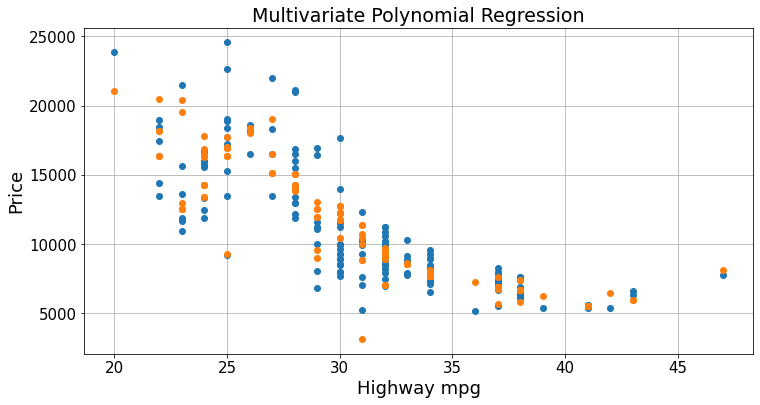

In [19]:
x_new = df['Highway mpg']
Yhat = ypipe
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_new,Y,'o')
ax.plot(x_new, Yhat,'o')
ax.set_xlabel(r"Highway mpg", fontsize=18)
ax.set_ylabel(r"Price", fontsize=18)
ax.set_title(r"Multivariate Polynomial Regression", fontsize=19)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

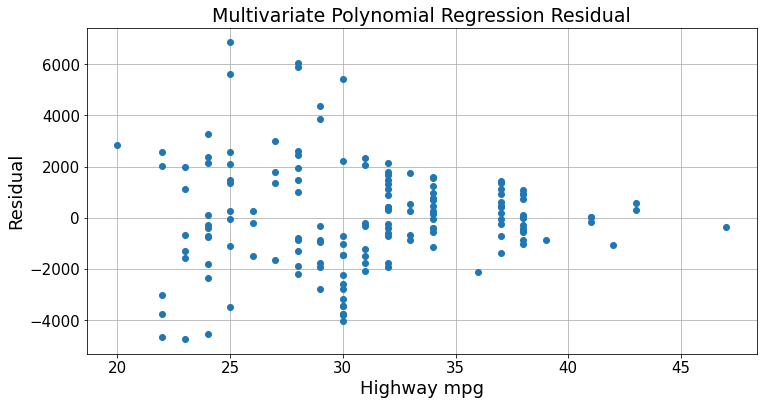

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_new,Y - Yhat,'o')
ax.set_xlabel(r"Highway mpg", fontsize=18)
ax.set_ylabel(r"Residual", fontsize=18)
ax.set_title(r"Multivariate Polynomial Regression Residual", fontsize=19)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

### Evaluation of the same method with an 11th Order polynomial

In [21]:
# Data selection
X_mult = df[['Horsepower', 'City mpg', 'Highway mpg']]
Y = df['Price']
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=11)), ('model',LinearRegression())]
# We input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
# Normalize the data, perform a transform and fit the model simultaneously.
pipe.fit(X_mult,Y)
# Prediction
ypipe=pipe.predict(X_mult)
ypipe[0:4]

array([5118.0000013 , 5195.00000049, 5348.00000006, 5510.99999991])

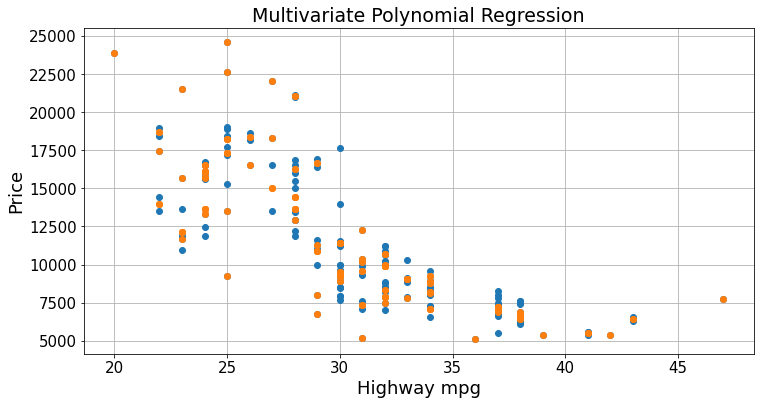

In [22]:
x_new = df['Highway mpg']
Yhat = ypipe
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_new,Y,'o')
ax.plot(x_new, Yhat,'o')
ax.set_xlabel(r"Highway mpg", fontsize=18)
ax.set_ylabel(r"Price", fontsize=18)
ax.set_title(r"Multivariate Polynomial Regression", fontsize=19)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

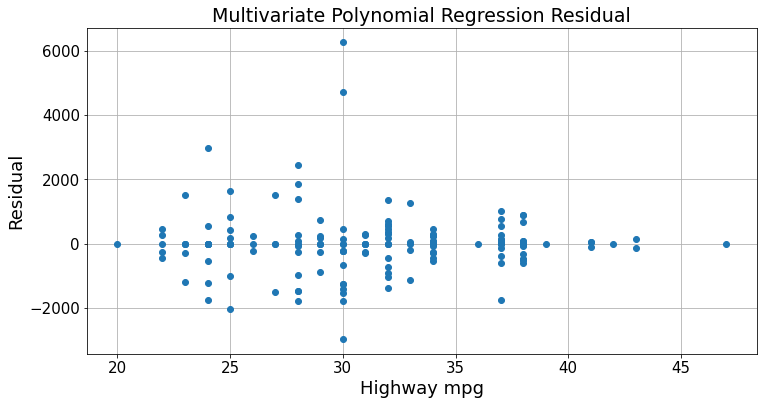

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_new,Y - Yhat,'o')
ax.set_xlabel(r"Highway mpg", fontsize=18)
ax.set_ylabel(r"Residual", fontsize=18)
ax.set_title(r"Multivariate Polynomial Regression Residual", fontsize=19)
ax.tick_params(labelsize=15)
ax.axis("tight")
ax.grid(True)

## 7. Model evaluation measurements.

We need a quantitative measure to determine how accurate the model is. The two most important measures often used are:

- $R^2$ / R-squared
- Mean Squared Error (MSE)

**R-squared**, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error (MSE)** measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (y_hat).

For this analysis we need:

- `from sklearn.metrics import mean_squared_error`
- `from sklearn.metrics import r2_score`

### Let's calculate the R^2 and MSE for **3. Linear Regression**

In [24]:
# Creation of the linear regression model
lr = LinearRegression()
# Data selection
X = df[['Highway mpg']]
Y = df['Price']
# Fit the model
lr.fit(X,Y)
# Predict
Yhat=lr.predict(X)
# Find the R^2
print('The R-square is: ', lr.score(X, Y))
# Find the mse
mse = mean_squared_error(df['Price'], Yhat)
print('The mean square error is: ', mse)

The R-square is:  0.6214643149741634
The mean square error is:  7830964.465891289


We can say that ~ 62.15% of the variation of the price is explained by this simple linear model "horsepower_fit".

### Let's calculate the R^2 and MSE for **4. Multiple Linear Regression**

In [25]:
# Creation of the linear regression model
lr_mult = LinearRegression()
# Data selection
X_mult = df[['Horsepower', 'City mpg', 'Highway mpg']]
Y = df['Price']
# Fit the model
lr_mult.fit(X_mult,Y)
# Predict
Yhat_mult = lr_mult.predict(X_mult)
# Find the R^2
print('The R-square is: ', lr_mult.score(X_mult, Y))
# Find the mse
print('The mean square error is: ', mean_squared_error(Y, Yhat_mult))

The R-square is:  0.7082645991837625
The mean square error is:  6035281.870660562


We can say that ~ 70.82% of the variation of price is explained by this multiple linear regression model.

### Let's calculate the R^2 and MSE for **5. Polynomial Regression** (cubic)

In [26]:
# Data selection
X = df['Highway mpg']
Y = df['Price']
# Creation of the polynomial regression model
poly_coeff = np.polyfit(X, Y, 3)
polinomial = np.poly1d(poly_coeff)
# Find the R^2
r_squared = r2_score(Y, polinomial(X))
print('The R-square value is: ', r_squared)
# Find the mse
mse = mean_squared_error(Y, polinomial(X))
print('The mean square error is: ', mse)

The R-square value is:  0.6669364875306932
The mean square error is:  6890257.997351189


We can say that ~ 66.69 % of the variation of price is explained by this polynomial fit

### Let's calculate the R^2 and MSE for **5. Polynomial Regression** (11th order)

In [27]:
# Data selection
X = df['Highway mpg']
Y = df['Price']
# Creation of the polynomial regression model
poly_coeff_2 = np.polyfit(X, Y, 11)
polinomial_2 = np.poly1d(poly_coeff_2)
# Find the R^2
r_squared = r2_score(Y, polinomial_2(X))
print('The R-square value is: ', r_squared)
# Find the mse
mse = mean_squared_error(Y, polinomial_2(X))
print('The mean square error is: ', mse)

The R-square value is:  0.7682847904392456
The mean square error is:  4793612.97773807


We can say that ~ 76.82 % of the variation of price is explained by this polynomial fit

### Let's calculate the R^2 and MSE for **6. Multivariate Polynomial Regression** (3rd Order)

In [28]:
# Data selection
X_mult = df[['Horsepower', 'City mpg', 'Highway mpg']]
Y = df['Price']

# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False, degree=3)), ('model',LinearRegression())]
# We input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
# Normalize the data, perform a transform and fit the model simultaneously.
# pipe.fit(X_mult,Y)
pipe.fit(X_mult,Y)
# Prediction
ypipe=pipe.predict(X_mult)


# Find the R^2
r_squared = r2_score(Y, ypipe)
print('The R-square value is: ', r_squared)
# Find the mse
mse = mean_squared_error(Y, ypipe)
print('The mean square error is: ', mse)

The R-square value is:  0.7954344399544464
The mean square error is:  4231954.06676795


We can say that ~ 79.54 % of the variation of price is explained by this polynomial fit

### Let's calculate the R^2 and MSE for **6. Multivariate Polynomial Regression** (11th Order)

In [29]:
# Data selection
X_mult = df[['Horsepower', 'City mpg', 'Highway mpg']]
Y = df['Price']

# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False,degree=11)), ('model',LinearRegression())]
# We input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
# Normalize the data, perform a transform and fit the model simultaneously.
# pipe.fit(X_mult,Y)
pipe.fit(X_mult,Y)
# Prediction
ypipe=pipe.predict(X_mult)


# Find the R^2
r_squared = r2_score(Y, ypipe)
print('The R-square value is: ', r_squared)
# Find the mse
mse = mean_squared_error(Y, ypipe)
print('The mean square error is: ', mse)

The R-square value is:  0.9518431935710567
The mean square error is:  996244.8848385868


We can say that ~ 95.18 % of the variation of price is explained by this polynomial fit

## 8. Determining a Good Model Fit

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

#### Simple Regression model vs Multiple Regression model

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

So to be able to compare the results, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model:

- Simple Linear Regression:
    - The R-square is:  0.6214643149741634
    - The mean square error is:  7830964.465891289


- Multivariate Linear Regression:
    - The R-square is:  0.7082645991837625
    - The mean square error is:  6035281.870660562


- Simple Polynomial Regression (3rd Order):
    - The R-square value is:  0.6669364875306932
    - The mean square error is:  6890257.997351189


- Simple Polynomial Regression (11th Order):
    - The R-square value is:  0.7682847904392456
    - The mean square error is:  4793612.97773807


- Multivariate polynomial Regression (3nd Order):
    - The R-square value is:  0.7954344399544464
    - The mean square error is:  4231954.06676795


- Multivariate polynomial Regression (11th Order):
    - The R-square value is:  0.9518431935710567
    - The mean square error is:  996244.8848385868
    
#### Conclusion:
Comparing these models, we conclude that the last model is the best one to predict price from our dataset.